# Introduction

The MIMIC-III database (version 1.4, 2016) is a publicly available critical care database containing de-identified data on 46,520 patients and 58,976 admissions to the ICU of the Beth Israel Deaconess Medical Center, Boston, USA, between 1 June, 2001 and 31 October, 2012. 

#  Data Science Questions:

1. Which age group is most in the hospital?
2. Which age group of patients dies more in the hospital?
3. Which gender is the most prevalent in the hospital?
4. How many patients died in the hospital with atrial fibrillation?
5. How many patients in the hospital have depression?
6. How many patients in the hospital have depression?
7. What is the rate of non-survived patients with hypertension?
8. How many patients Alive in the hospital they are with renal failure?
9. How many patients Death in the hospital they are with Hyperlipemia ?
10. How many patients Death in the hospital they are with Anemia?

**Importing Necessary Library and packages**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sbn
import seaborn as sb
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import sys
import warnings
warnings.filterwarnings('ignore')

**Reading the Dataset**

In [ ]:
df = pd.read_csv('/content/data01.csv')

**data preprocessing**

In [ ]:
df.head()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     1177 non-null   int64  
 1   ID                        1177 non-null   int64  
 2   outcome                   1176 non-null   float64
 3   age                       1177 non-null   int64  
 4   gendera                   1177 non-null   int64  
 5   BMI                       962 non-null    float64
 6   hypertensive              1177 non-null   int64  
 7   atrialfibrillation        1177 non-null   int64  
 8   CHD with no MI            1177 non-null   int64  
 9   diabetes                  1177 non-null   int64  
 10  deficiencyanemias         1177 non-null   int64  
 11  depression                1177 non-null   int64  
 12  Hyperlipemia              1177 non-null   int64  
 13  Renal failure             1177 non-null   int64  
 14  COPD    

In [ ]:
len(df)

1177

In [ ]:
df.shape

(1177, 51)

In [ ]:
df.drop(['group','ID'],axis=1,inplace=True)

In [ ]:
df.head(5)

,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,0.0,72,1,37.588179,0,0,0,1,1,0,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,0.0,75,2,NaN,0,0,0,0,1,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,0.0,83,2,26.572634,0,0,0,0,1,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,0.0,43,2,83.264629,0,0,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,0.0,75,2,31.824842,1,0,0,0,1,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


Checking null values

In [ ]:
df.isnull().sum()

outcome                       1
age                           0
gendera                       0
BMI                         215
hypertensive                  0
atrialfibrillation            0
CHD with no MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal failure                 0
COPD                          0
heart rate                   13
Systolic blood pressure      16
Diastolic blood pressure     16
Respiratory rate             13
temperature                  19
SP O2                        13
Urine output                 36
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 144
Basophils                   259
Lymphocyte                  145
PT      

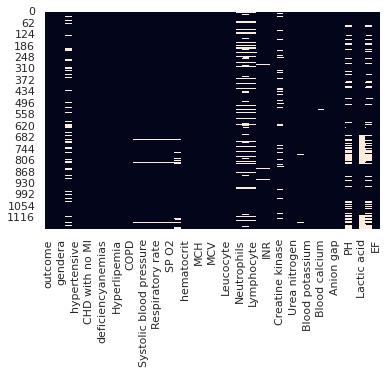

In [ ]:
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
df = df.dropna(how='any',axis=0) 

In [ ]:
df.duplicated().sum()

0

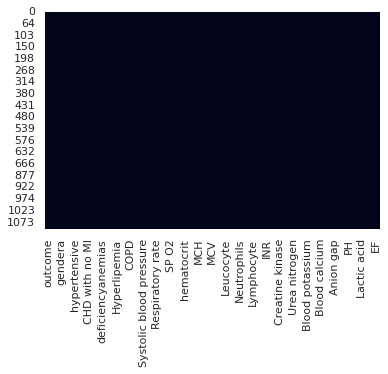

In [ ]:
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
df.describe()

,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,...,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,0.151869,72.514019,1.516355,30.858403,0.703271,0.422897,0.067757,0.457944,0.336449,0.130841,...,139.326967,8.448076,102.614122,14.116525,2.135186,7.374790,26.820936,1.900347,45.381160,48.154206
std,0.359314,13.424689,0.500317,9.630081,0.457351,0.494598,0.251623,0.498811,0.473047,0.337621,...,3.926662,0.563461,5.200159,2.644287,0.242133,0.065736,5.621605,0.997925,13.019605,13.043058
min,0.000000,35.000000,1.000000,13.673625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,121.045455,6.700000,85.642857,7.777778,1.414286,7.158333,12.857143,0.500000,19.500000,15.000000
25%,0.000000,63.000000,1.000000,24.431441,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,137.000000,8.089722,99.305769,12.250000,1.978750,7.330000,23.000000,1.200000,36.958333,40.000000
50%,0.000000,74.000000,2.000000,28.429763,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,139.727273,8.440833,102.636364,13.891176,2.100000,7.375778,26.186813,1.660000,42.450000,55.000000
75%,0.000000,84.000000,2.000000,34.460033,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,142.000000,8.800000,105.865079,15.673077,2.243506,7.425000,29.750000,2.300000,50.520833,55.000000
max,1.000000,99.000000,2.000000,83.264629,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,149.133333,10.950000,117.315789,25.272727,4.072727,7.560000,47.666667,6.725000,98.600000,75.000000


**Observe the Correlation of the Comorbidities with dependent variable (i.e. outcome)**

In [ ]:
col = ['gendera', 'hypertensive','atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'outcome']



In [ ]:
corr = df[col].corr()


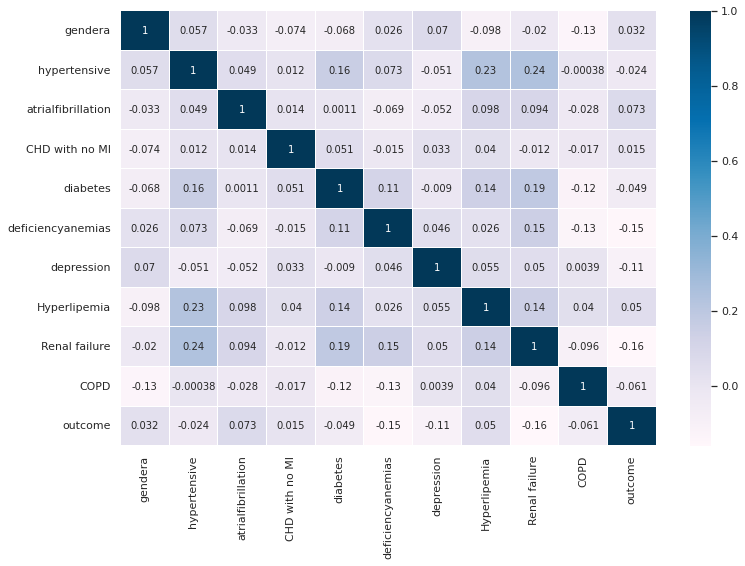

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='PuBu',linewidths=0.01,linecolor="white");

**Analysis Data**

# Q1.Which age group is most in the hospital?

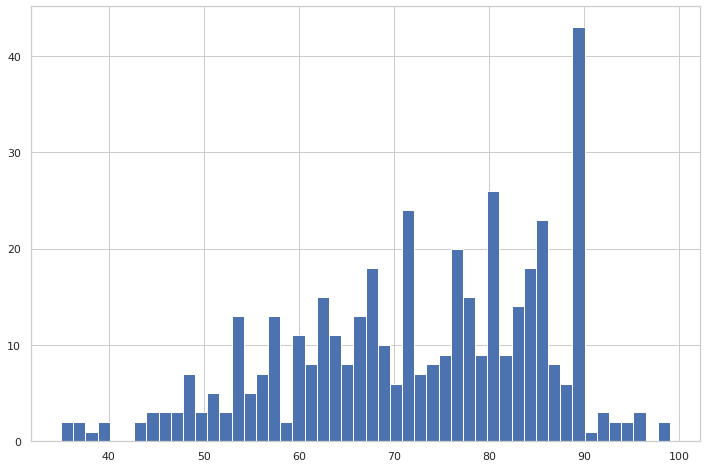

In [ ]:
import matplotlib.pyplot as plt
df.age.hist(bins = 50, figsize=(12,8))
plt.show()

Here we can see that 89 age group are most in the hospital

# Q2.Which age group of patients dies more in the hospital?

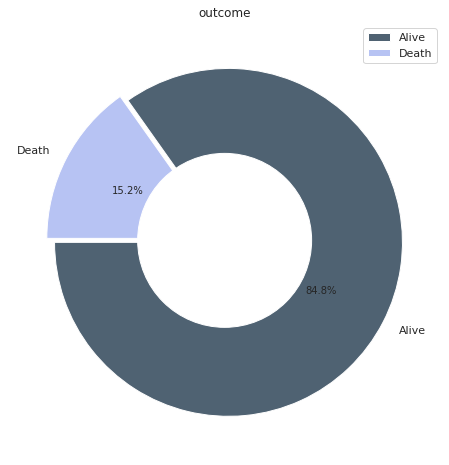

In [ ]:
plt.figure(figsize=(12,8))
plt.title("outcome")
circle = plt.Circle((0, 0), 0.5, color='white')
g = plt.pie(df.outcome.value_counts(), explode=(0.025,0.025),  labels=['Alive','Death'], colors=['#4F6272', '#B7C3F3'],autopct='%1.1f%%', startangle=180);
plt.legend()
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()


**More then 15% patients are died in the hospital remaining patients were alive**

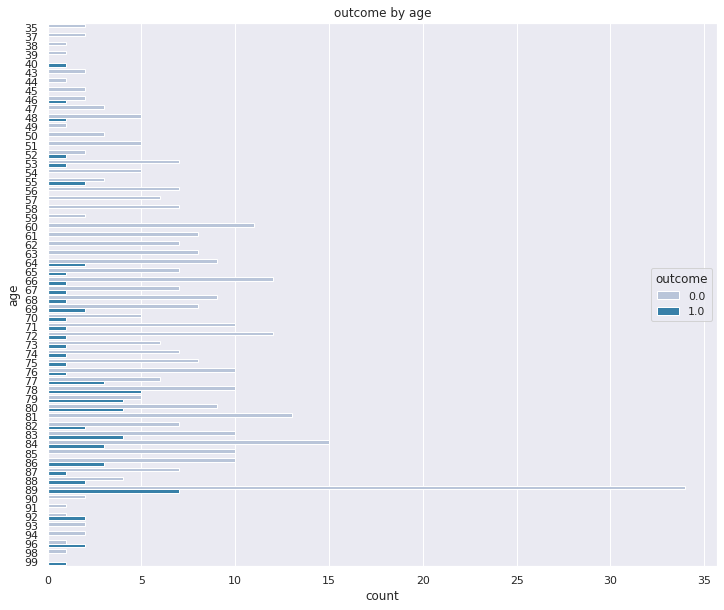

In [ ]:
plt.figure(figsize=(12,10))
sns.set_theme(style="darkgrid", color_codes=True)
ax = sns.countplot(y="age", hue="outcome", data=df, palette="PuBu")
plt.title("outcome by age")
plt.show()

**We can see that the mostdeath are from ages 88-99 and it is increased**

# Q3.Which gender is the most prevalent in the hospital?

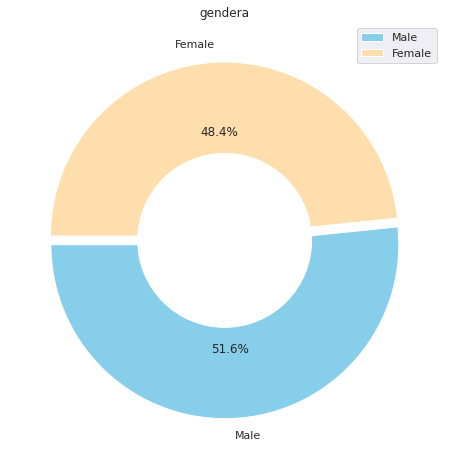

In [ ]:
plt.figure(figsize=(12,8))
plt.title("gendera")
circle = plt.Circle((0, 0), 0.5, color='white')
g = plt.pie(df.gendera.value_counts(), explode=(0.025,0.025),  labels=['Male','Female'], colors=['skyblue','navajowhite'],autopct='%1.1f%%', startangle=180);
plt.legend()
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

**Male and female patient are almost same in the hospital**

# Death patient by Gender

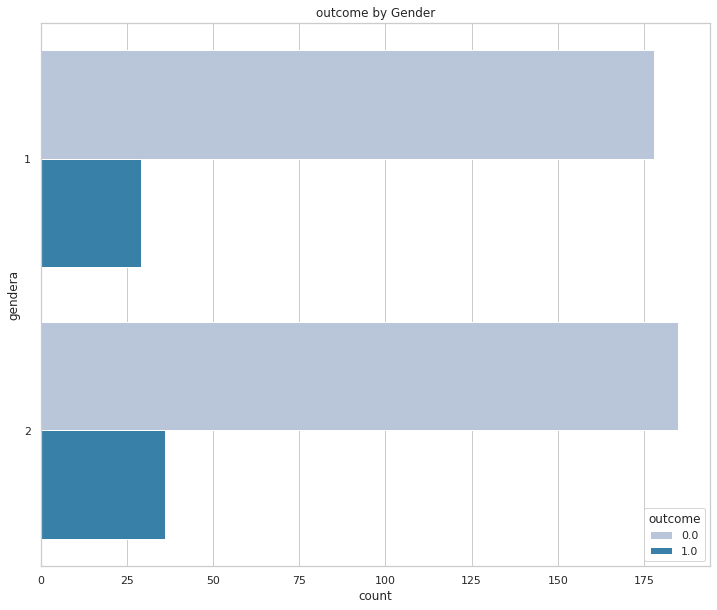

In [ ]:
plt.figure(figsize=(12,10))
sns.set_theme(style="whitegrid", color_codes=True)
ax = sns.countplot(y="gendera", hue="outcome", data=df, palette="PuBu")
plt.title("outcome by Gender")
plt.show()

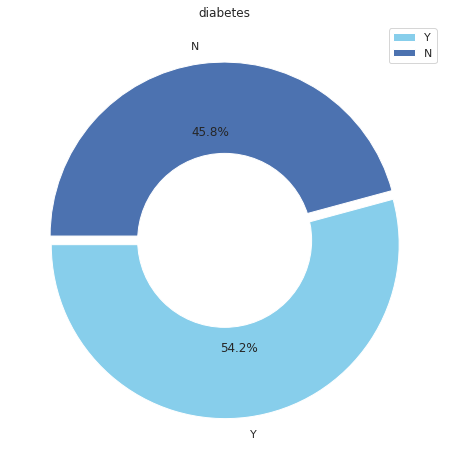

In [ ]:
plt.figure(figsize=(12,8))
plt.title("diabetes")
circle = plt.Circle((0, 0), 0.5, color='white')
g = plt.pie(df.diabetes.value_counts(), explode=(0.025,0.025), labels=['Y','N'], colors=['skyblue','b'],autopct='%1.1f%%', startangle=180);
plt.legend()
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

# Q4.How many diabetic patients die in hospital?

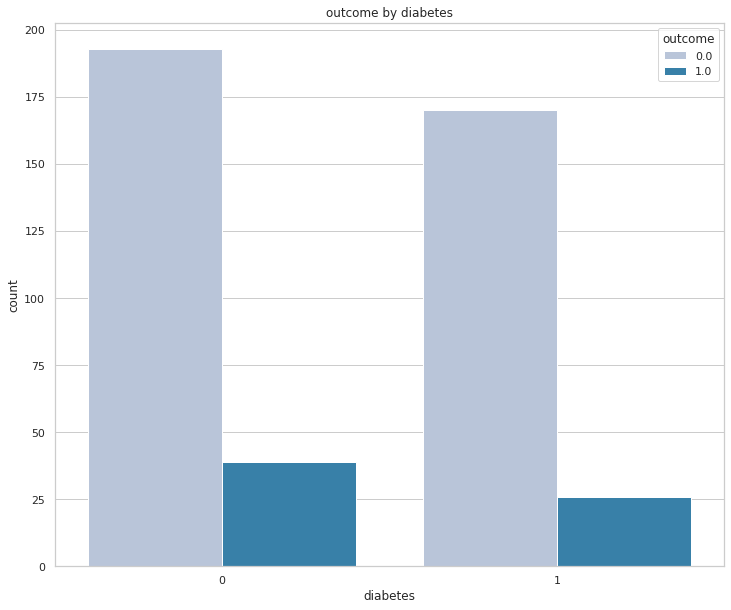

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(df['diabetes'],hue=df['outcome'],palette="PuBu")
plt.title("outcome by diabetes")
plt.show()

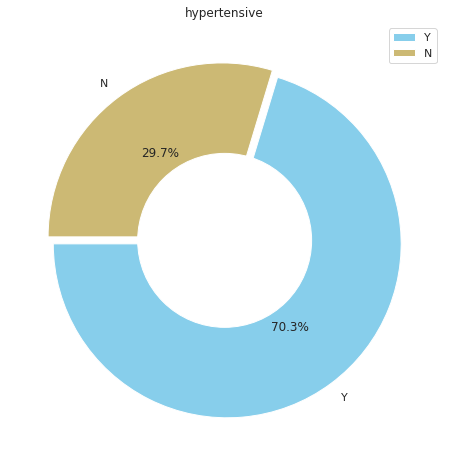

In [ ]:
plt.figure(figsize=(12,8))
plt.title("hypertensive")
circle = plt.Circle((0, 0), 0.5, color='white')
g = plt.pie(df.hypertensive.value_counts(), explode=(0.025,0.025), labels=['Y','N'], colors=['skyblue','y'],autopct='%1.1f%%', startangle=180);
plt.legend()
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

# Q7.What is the rate of non-survived patients with hypertension?

# hypertensive patients die

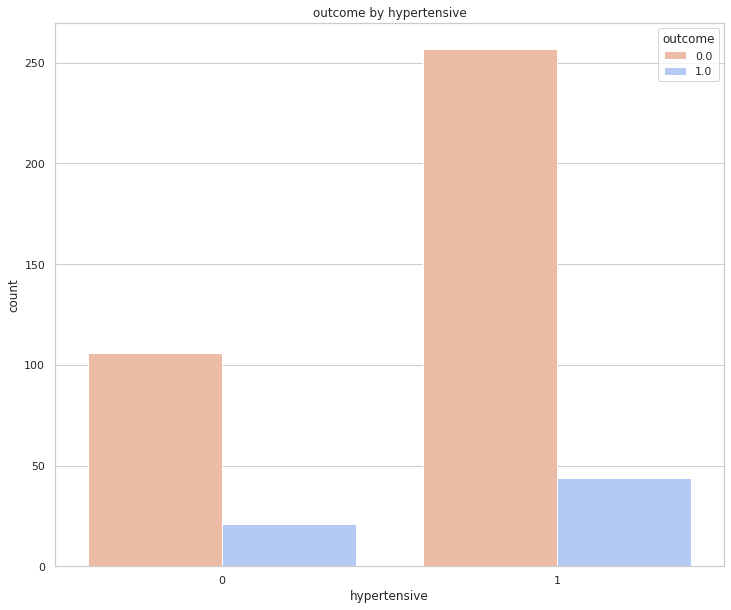

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(df['hypertensive'],hue=df['outcome'],palette="coolwarm_r")
plt.title("outcome by hypertensive")
plt.show()

# Q5.How many patients died with atrial fibrillation in the hospital?

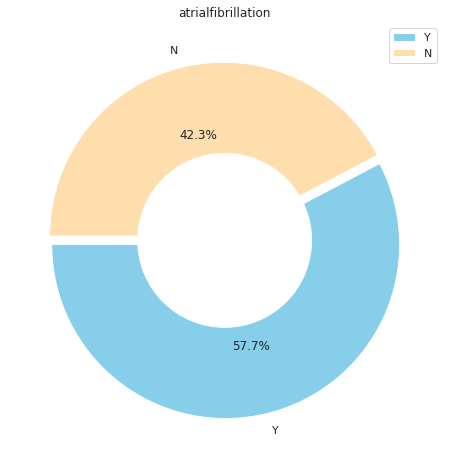

In [ ]:
plt.figure(figsize=(12,8))
plt.title("atrialfibrillation")
circle = plt.Circle((0, 0), 0.5, color='white')
g = plt.pie(df.atrialfibrillation.value_counts(), explode=(0.025,0.025), labels=['Y','N'], colors=['skyblue','navajowhite'],autopct='%1.1f%%', startangle=180);
plt.legend()
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

# atrialfibrillation patients die

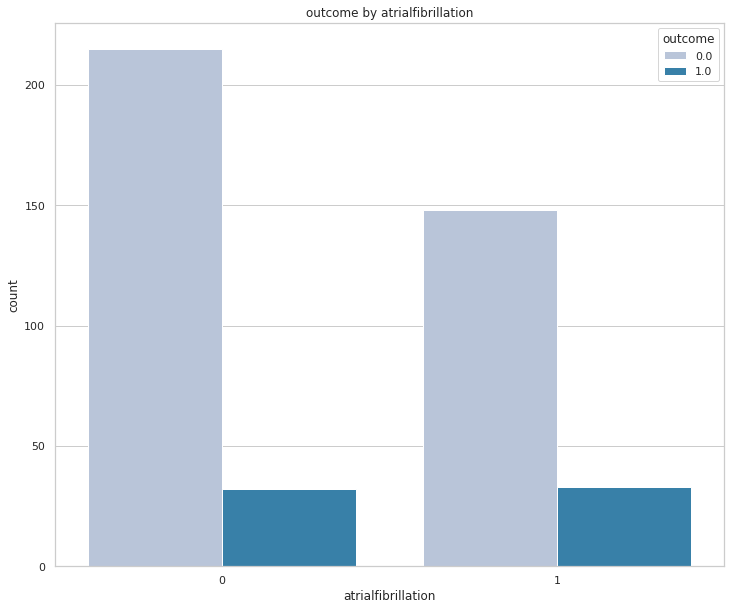

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(df['atrialfibrillation'],hue=df['outcome'],palette="PuBu")
plt.title("outcome by atrialfibrillation")
plt.show()

Here we can see that the death rate is high, with atrial fibrillation being the most

# Q6.How many patients in the hospital have depression?

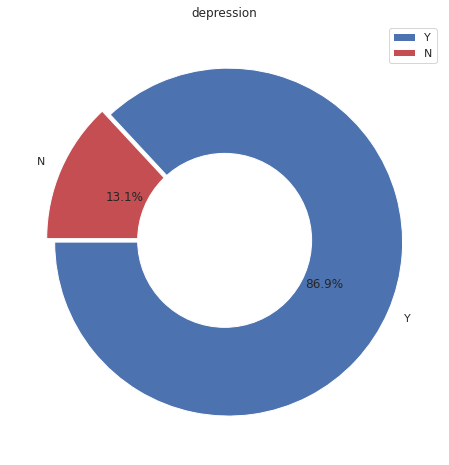

In [ ]:
plt.figure(figsize=(12,8))
plt.title("depression")
circle = plt.Circle((0, 0), 0.5, color='white')
g = plt.pie(df.depression.value_counts(), explode=(0.025,0.025), labels=['Y','N'], colors=['b','r'],autopct='%1.1f%%', startangle=180);
plt.legend()
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

We can see that 86% of all patients have depression while they are in the hospital.


# patients died in the hospital with depression

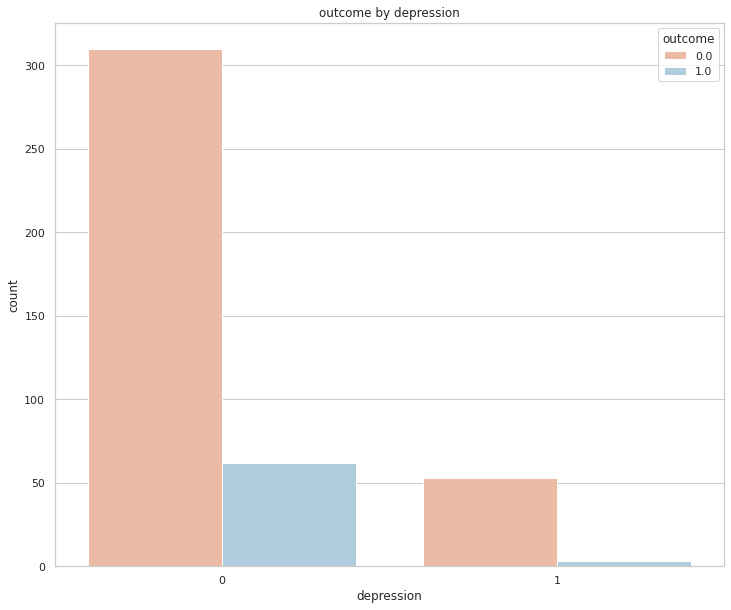

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(df['depression'],hue=df['outcome'],palette="RdBu")
plt.title("outcome by depression")
plt.show()


# Random Observation of data disitibution for Continuous variables

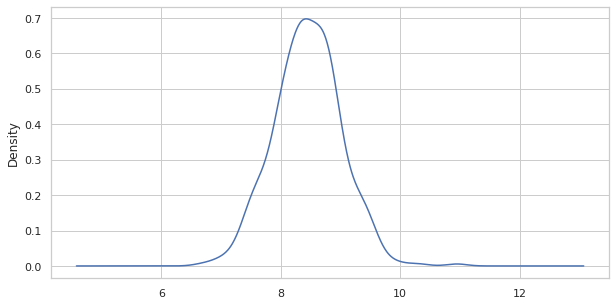

In [ ]:
plt.figure(figsize=(10,5))
df['Blood calcium'].plot(kind='kde')

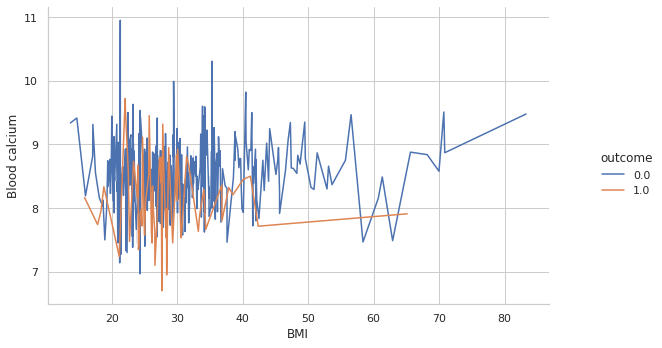

In [ ]:
from seaborn.relational import relplot
f= sns.relplot(data=df, x="BMI", y="Blood calcium", hue="outcome",kind="line")
f.fig.set_figwidth(10)
f.fig.set_figheight(5)

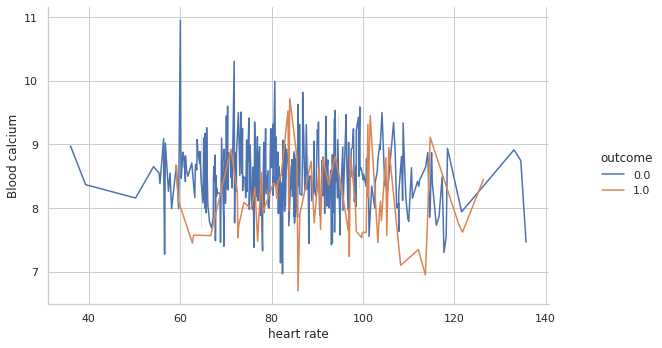

In [ ]:
from seaborn.relational import relplot
f= sns.relplot(data=df, x="heart rate", y="Blood calcium", hue="outcome",kind="line")
f.fig.set_figwidth(10)
f.fig.set_figheight(5)

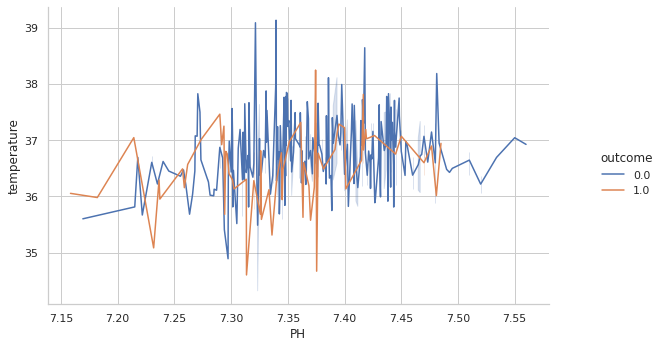

In [ ]:
from seaborn.relational import relplot
f= sns.relplot(data=df, x="PH", y="temperature", hue="outcome",kind="line")
f.fig.set_figwidth(10)
f.fig.set_figheight(5)

# Q8.How many patients Alive in the hospital they are with renal failure?

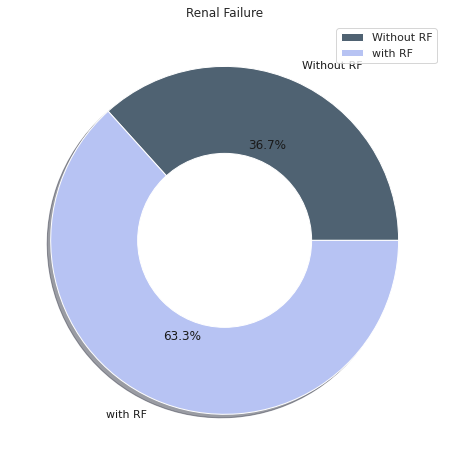

In [ ]:
plt.figure(figsize=(12,8))
circle = plt.Circle((0, 0), 0.5, color='white')
plt.pie(df['Renal failure'].value_counts(sort=False), autopct='%1.1f%%', shadow=True, labels=['Without RF', 'with RF'],
        colors = ['#4F6272', '#B7C3F3'], textprops = {'color':'k'}, 
        rotatelabels=False);
plt.title('Renal Failure')
plt.legend()
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

**Here we can see that 63% of patient with RF**

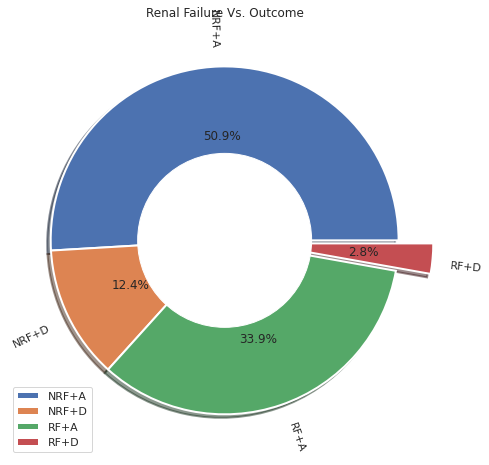

In [ ]:
plt.figure(figsize=(12,8))
circle = plt.Circle((0, 0), 0.5, color='white')
plt.pie(df.groupby(['Renal failure', 'outcome']).outcome.count(), autopct='%1.1f%%', shadow=True, 
        wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },
        labels = ['NRF+A', 'NRF+D', 'RF+A', 'RF+D'],
        explode=(0,0,0,0.2), rotatelabels=True)
plt.title('Renal Failure Vs. Outcome')
plt.legend()
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

**Patients without Renal Failure + Alive (50.9%)**

# Q9.How many patients Death in the hospital they are with Hyperlipemia ?

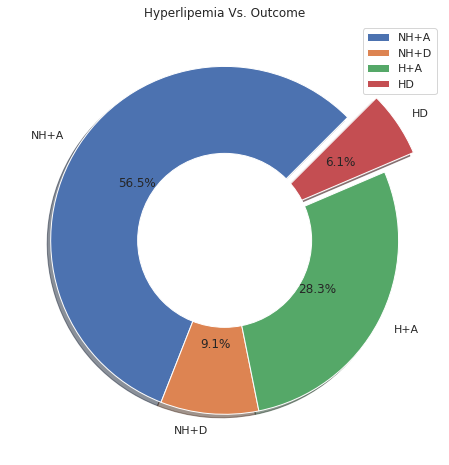

In [ ]:
plt.figure(figsize=(12,8))
circle = plt.Circle((0, 0), 0.5, color='white')
plt.pie(df.groupby(['Hyperlipemia', 'outcome']).outcome.count(), autopct='%1.1f%%', labels=['NH+A', 'NH+D', 'H+A', 'HD'], 
          explode=(0,0,0,0.2), startangle=45, shadow=True)
plt.title('Hyperlipemia Vs. Outcome')
plt.legend()
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

**6.1% Patients death with Hyperlipemia**

# Q10.How many patients Death in the hospital they are with Anemia?

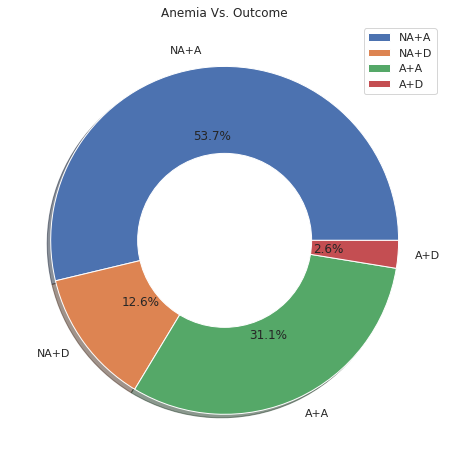

In [ ]:
plt.figure(figsize=(12,8))
circle = plt.Circle((0, 0), 0.5, color='white')
plt.pie(df.groupby(['deficiencyanemias', 'outcome']).outcome.count(), autopct='%1.1f%%', labels=['NA+A', 'NA+D', 'A+A', 'A+D'], shadow=True)
plt.title('Anemia Vs. Outcome')
plt.legend()
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

**Here we can see that 2.6% of patient death with Anemia in hospital**

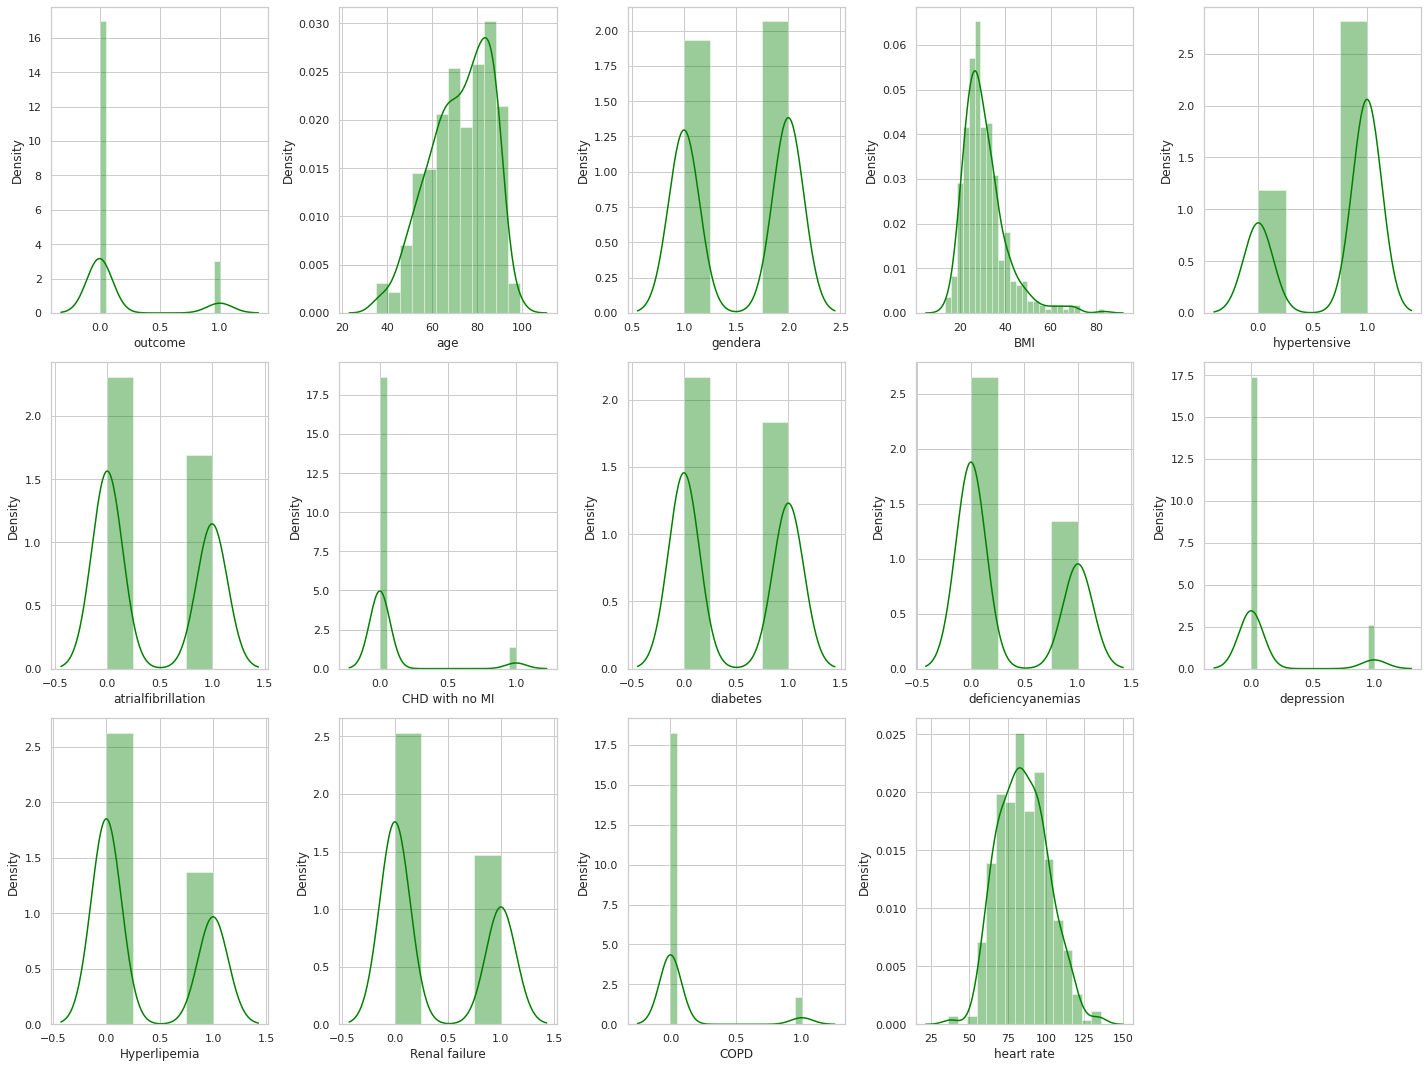

In [ ]:
plt.figure(figsize = (20, 15))
plotnumber = 1
for column in df:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column],color='green')
        plt.xlabel(column)
    
        
    plotnumber += 1

plt.tight_layout()
plt.show()

# References

1. https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
2. https://towardsdatascience.com/complete-guide-to-data-visualization-with-python-2dd74df12b5e
3. https://pythonbasics.org/seaborn-pairplot/
4. https://pynative.com/python-matplotlib-exercise/
